In [2]:
!git clone https://github.com/Logren777/PlantDataset
import tensorflow as tf
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image

fatal: destination path 'PlantDataset' already exists and is not an empty directory.


In [3]:
data_dir="PlantDataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
train = os.listdir(train_dir)
val = os.listdir(valid_dir)

In [4]:
batch_size=2

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  valid_dir,
  seed=123,
  image_size=(224, 224),
  batch_size=batch_size)

Found 70295 files belonging to 38 classes.


2024-05-18 14:15:04.778502: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 14:15:04.884108: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-18 14:15:04.884333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 17572 files belonging to 38 classes.


In [6]:
print(train_ds.class_names)
num_classes=len(train_ds.class_names)
print(num_classes)
print(batch_size)
print(train_ds)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [7]:
model=tf.keras.applications.MobileNetV2(alpha = 0.35)

#model.summary()

7149872/7149872 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
#
keras.utils.plot_model(model, "ResNet-50.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [9]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=5
)

Epoch 1/5


I0000 00:00:1716030920.619053  128216 service.cc:145] XLA service 0x7c8064007c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716030920.619068  128216 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-05-18 14:15:21.004898: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-18 14:15:22.530513: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1716030924.133693  128337 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_14188', 100 bytes spill stores, 100 bytes spill loads



   27/35148 ━━━━━━━━━━━━━━━━━━━━ 3:31 6ms/step - accuracy: 0.0000e+00 - loss: 7.1056

I0000 00:00:1716030933.671512  128216 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


35148/35148 ━━━━━━━━━━━━━━━━━━━━ 269s 7ms/step - accuracy: 0.6831 - loss: 1.2362 - val_accuracy: 0.9341 - val_loss: 0.2149
Epoch 2/5
35148/35148 ━━━━━━━━━━━━━━━━━━━━ 229s 7ms/step - accuracy: 0.9387 - loss: 0.2026 - val_accuracy: 0.9523 - val_loss: 0.1630
Epoch 3/5
35148/35148 ━━━━━━━━━━━━━━━━━━━━ 227s 6ms/step - accuracy: 0.9598 - loss: 0.1255 - val_accuracy: 0.9668 - val_loss: 0.1038
Epoch 4/5
35148/35148 ━━━━━━━━━━━━━━━━━━━━ 228s 6ms/step - accuracy: 0.9698 - loss: 0.0984 - val_accuracy: 0.9571 - val_loss: 0.1399
Epoch 5/5
35148/35148 ━━━━━━━━━━━━━━━━━━━━ 224s 6ms/step - accuracy: 0.9761 - loss: 0.0756 - val_accuracy: 0.9598 - val_loss: 0.1329


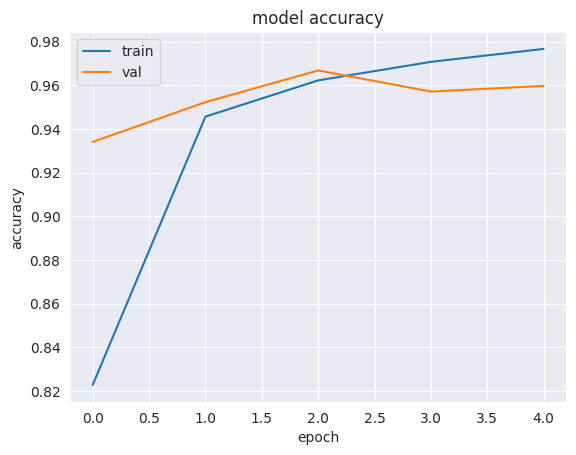

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
model.save('model.keras')

In [12]:
from google.colab import drive
drive.mount('/drive')
# copy it there
!cp model.keras "/drive/MyDrive/$(date +"%Y-%m-%dT%H:%M:%S")_model.keras"

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!git clone https://github.com/Logren777/PlantTestData

In [ ]:
from google.colab import drive
import tensorflow as tf
classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

def load_model():
  drive.mount('/drive')
  !cp -u "/drive/MyDrive/2024-05-10T19:41:06_model.keras" model.keras
  return tf.keras.models.load_model('model.keras')
model = load_model()

In [ ]:
import numpy as np

def load_image(path: str):
  image = tf.keras.utils.load_img(path, target_size=(224, 224))
  input_arr = tf.keras.utils.img_to_array(image)
  return np.array([input_arr])

def predict(path):
  img = load_image(path)
  predictions = model.predict(img)
  most_probable_i = np.argmax(predictions[0])
  return classes[most_probable_i]
# сделать по человечески с картинкой, accuracy
predict('/content/PlantTestData/test/test/PotatoEarlyBlight3.JPG'), predict('/content/PlantTestData/test/test/TomatoEarlyBlight4.JPG'), predict('/content/PlantTestData/test/test/AppleScab2.JPG')